In [7]:
import numpy as np
import scanpy as sc
import squidpy as sq
from soview import *

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [2]:
adata = sq.datasets.four_i()
adata.var_names_make_unique()

/root/anaconda3/envs/SOView/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata.var_names

Index(['DAPI_01', 'LAMP1', 'LC3B', 'RAB11', 'p-ERK', 'TSG101', 'p-AKT', 'EGFR',
       'p-AMPK', 'HSP60', 'p-GSK3B', 'ABCD3', 'PKM2', 'CCNE1', 'EIF1a',
       'ISG15', 'GSK3A/B', 'c-MYC', 'CCNB1', 'EEA1', 'p-RPS6', 'TFRC', 'CAV1',
       'VIME', 'p-4EBP1', 'p-FAK', 'SARA', 'GM130', 'p-MEK', 'CTNNB1', 'CRT',
       'Actin', 'PCNA', 'TUBA1A', 'p-EGFR', 'NUPS', 'PCNT', 'Yap/Taz', 'FBL',
       'Climp63', 'TGN46', 'VINC', 'p-ERK-1'],
      dtype='object')

In [4]:
adata.var_names

Index(['DAPI_01', 'LAMP1', 'LC3B', 'RAB11', 'p-ERK', 'TSG101', 'p-AKT', 'EGFR',
       'p-AMPK', 'HSP60', 'p-GSK3B', 'ABCD3', 'PKM2', 'CCNE1', 'EIF1a',
       'ISG15', 'GSK3A/B', 'c-MYC', 'CCNB1', 'EEA1', 'p-RPS6', 'TFRC', 'CAV1',
       'VIME', 'p-4EBP1', 'p-FAK', 'SARA', 'GM130', 'p-MEK', 'CTNNB1', 'CRT',
       'Actin', 'PCNA', 'TUBA1A', 'p-EGFR', 'NUPS', 'PCNT', 'Yap/Taz', 'FBL',
       'Climp63', 'TGN46', 'VINC', 'p-ERK-1'],
      dtype='object')

In [6]:
adata[:,protein]

View of AnnData object with n_obs × n_vars = 270876 × 2
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id', 'leiden', 'cluster'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [25]:
spatial_mat = adata.obsm['spatial']


In [26]:
spatial_mat_rev = spatial_mat.copy()
spatial_mat_rev[:,1] = -spatial_mat_rev[:,1]
adata.obsm['spatial'] = spatial_mat_rev

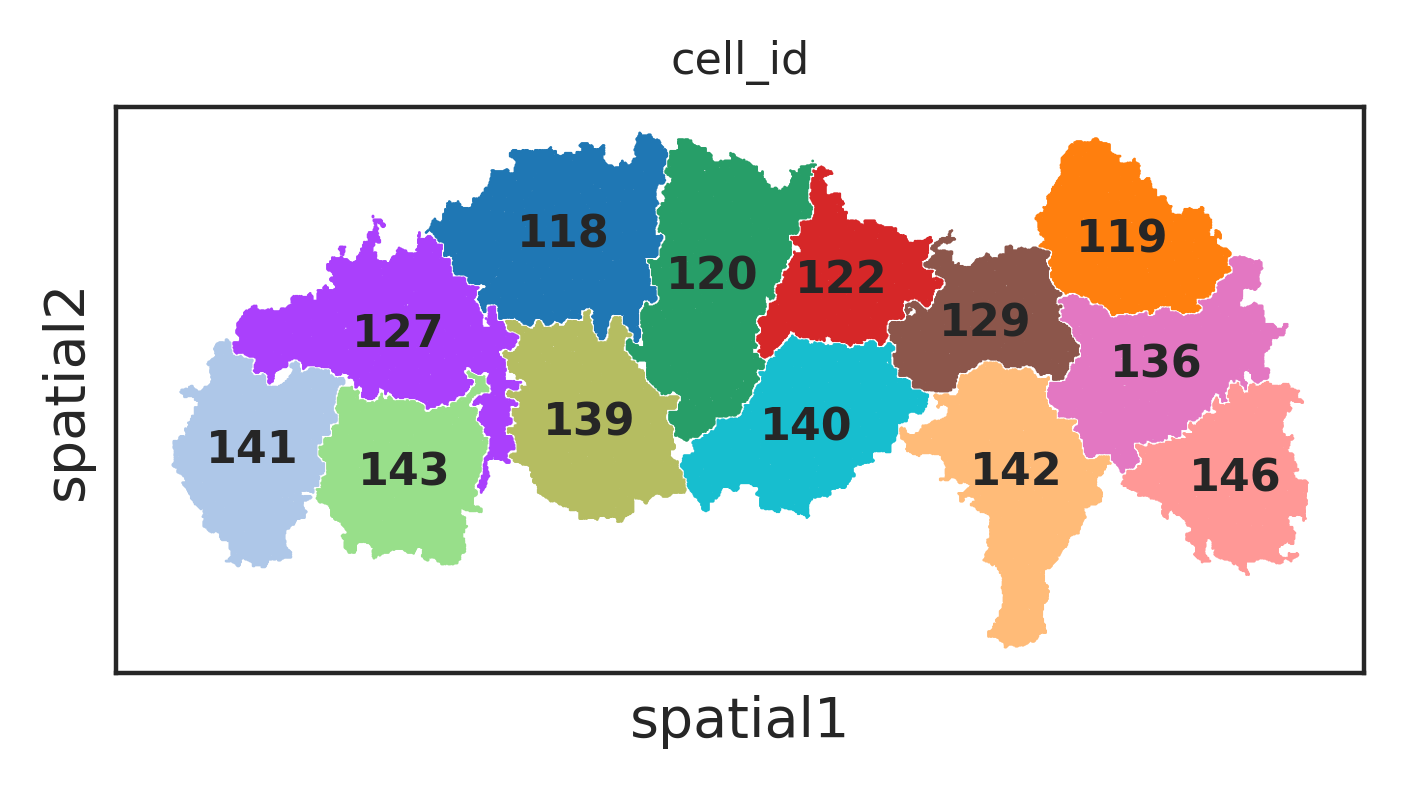

In [27]:
sc.pl.embedding(adata,basis='spatial',color=['cell_id'],show=False,size=1,legend_loc='on data')
plt.gca().set_aspect('equal', adjustable='box') 

In [9]:
group1 = ['141','143','120','122','142','136']
group2 = ['139','140','146','119','129','118','127']

In [10]:
['141','143','120','122','142','136','139','140','146','119','129','118','127']

AnnData object with n_obs × n_vars = 270876 × 43
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id', 'leiden', 'cluster'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'cell_id_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

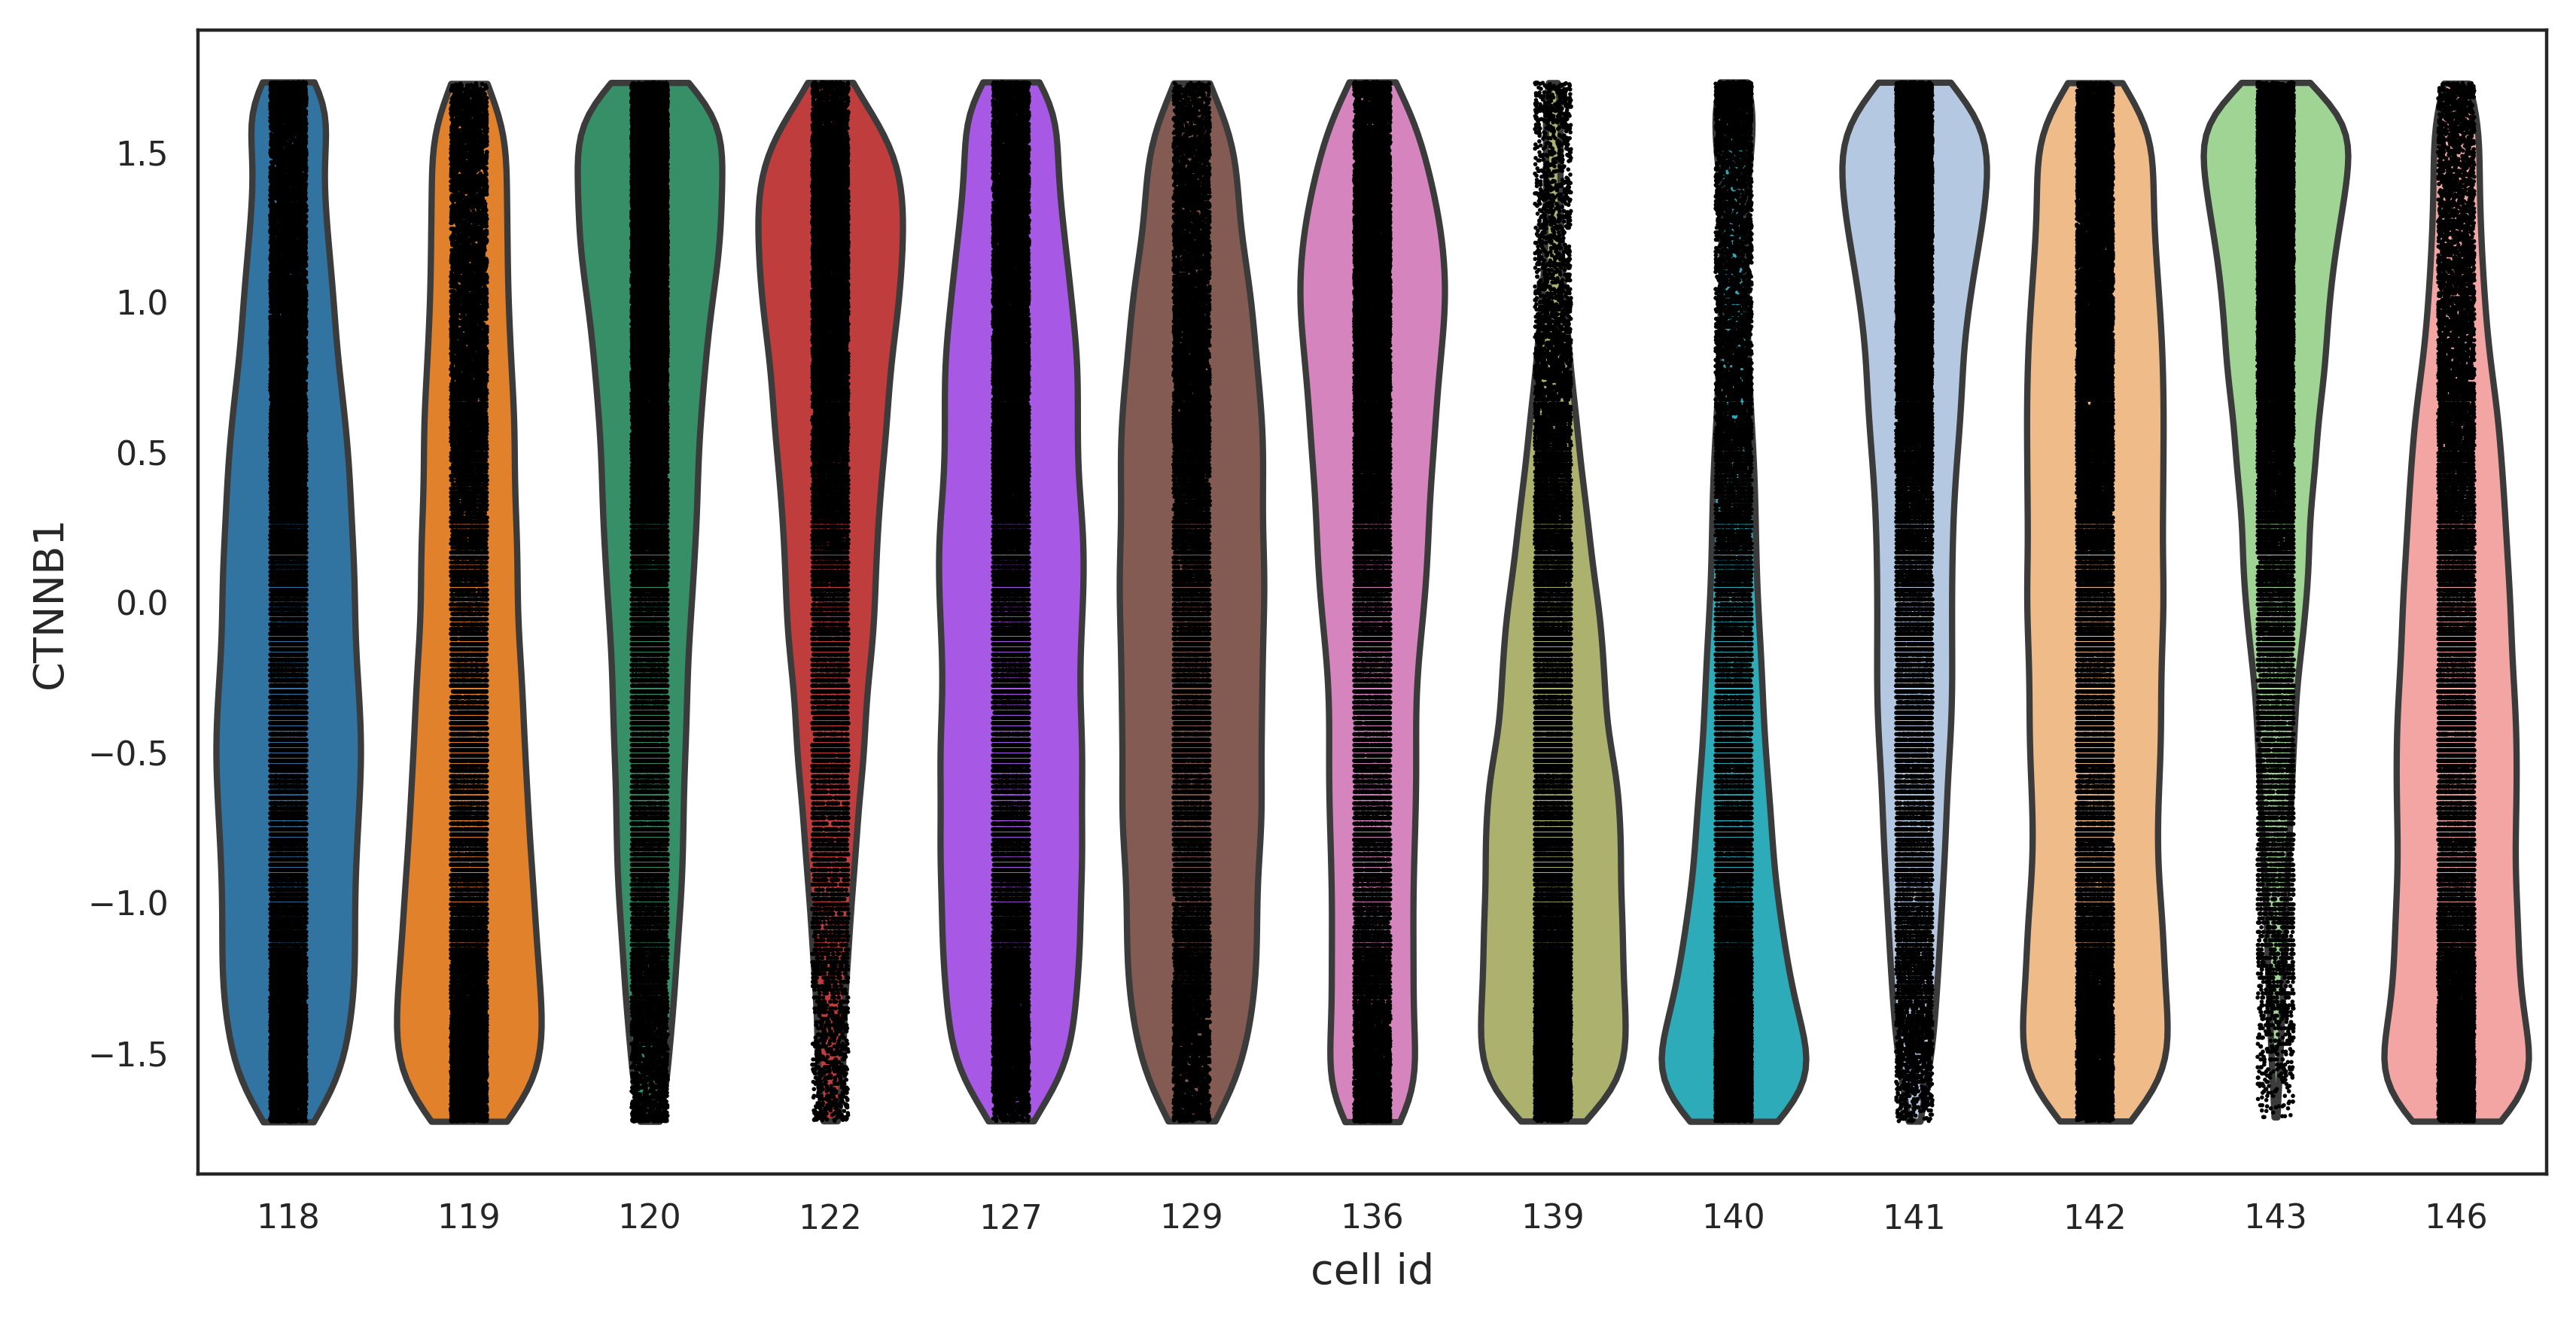

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sc.pl.violin(adata,keys=['CTNNB1'],groupby='cell_id',ax=ax)

In [18]:
adata_cyt = adata[adata.obs['is_cytplasm']==True]

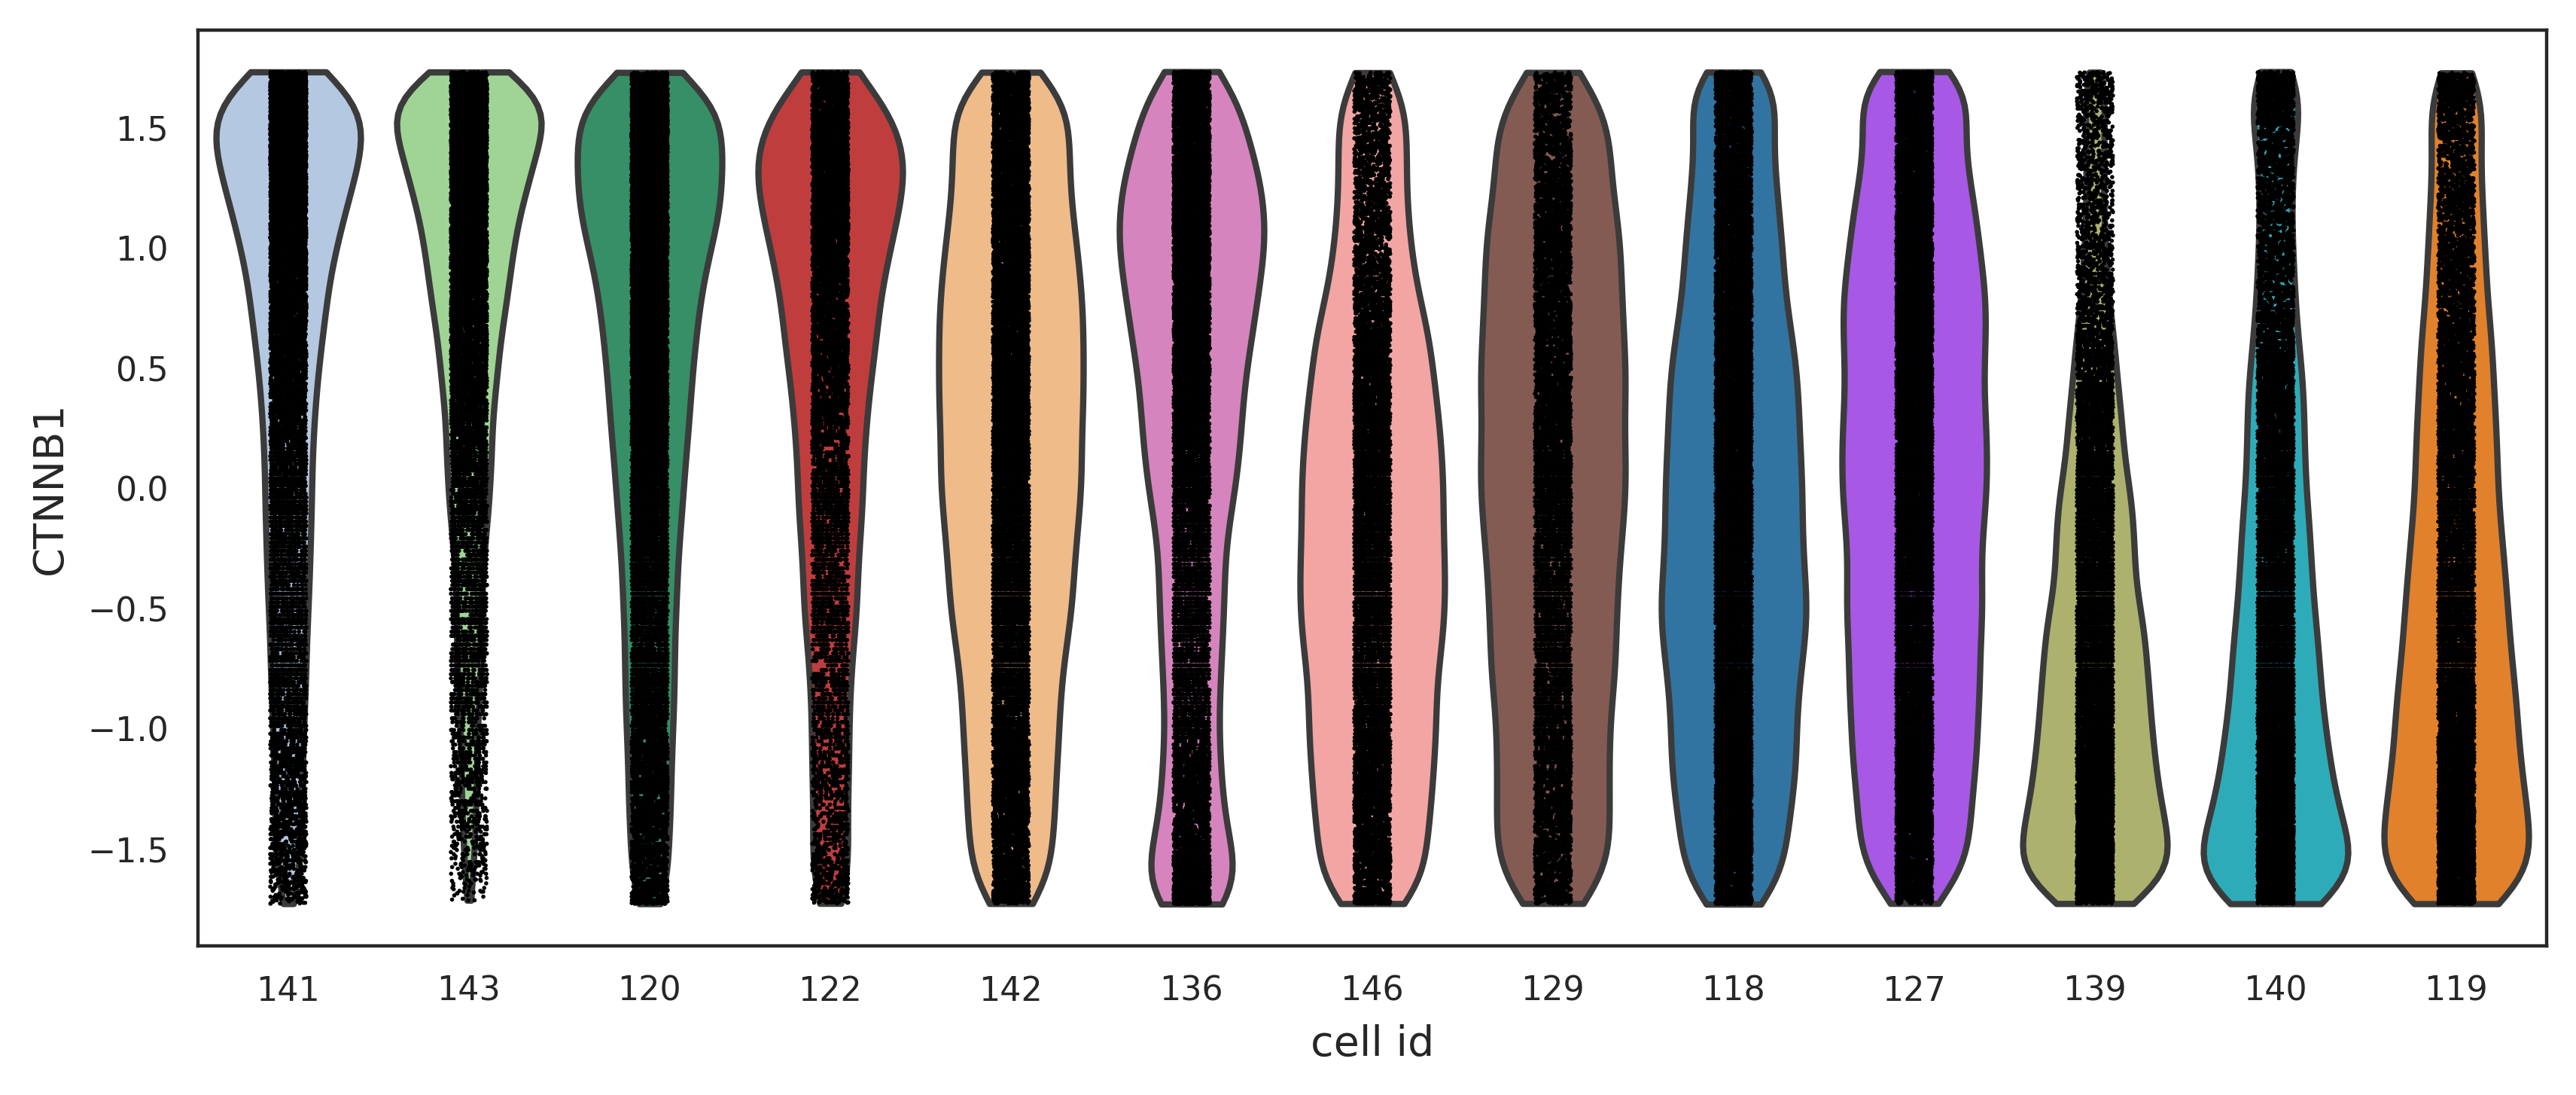

In [24]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
sc.pl.violin(adata_cyt,keys=['CTNNB1'],groupby='cell_id',ax=ax,order=['141','143','120','122','142','136','146','129','118','127','139','140','119'])